<a href="https://colab.research.google.com/github/puterianandityaa/Hotel-Price-Prediction/blob/main/Insight_Investigator_Homestay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
features = pd.read_csv('train_features.csv')
labels = pd.read_csv('train_label.csv')
test = pd.read_csv('test_feature.csv')

##Column Check

In [ ]:
features.head()

,facilities,rating,location
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol


In [ ]:
labels.head()

,Price
0,"13,500avg/night"
1,"13,000avg/night"
2,"19,000avg/night"
3,"6,000avg/night"
4,"20,000avg/night"


In [ ]:
test.head()

,ID,facilities,rating,location
0,0,GymrestaurantbarInternetSwimmingPools,8.0 ExcellentFrom 1 reviews,Stokol
1,1,Poolrestaurantgyminternetbar,7.4 Very GoodFrom 22 reviews,Hallerson
2,2,BARSwimmingPoolsInternetgym,0.0 FairFrom 4 reviews,Hallerson
3,3,gymSwimmingPoolsBARintrnetRestaurant,6.8 Very GoodFrom 13 reviews,Andeman
4,4,gymRestaurantpoolbarintrnet,0.0 FairFrom 9 reviews,Hallerson


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   facilities  2765 non-null   object
 1   rating      2429 non-null   object
 2   location    3066 non-null   object
dtypes: object(3)
memory usage: 72.0+ KB


In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   3066 non-null   object
dtypes: object(1)
memory usage: 24.1+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          767 non-null    int64 
 1   facilities  767 non-null    object
 2   rating      767 non-null    object
 3   location    767 non-null    object
dtypes: int64(1), object(3)
memory usage: 24.1+ KB


In [ ]:
features.isnull().sum()

facilities    301
rating        637
location        0
dtype: int64

In [ ]:
labels.isnull().sum()

Price    0
dtype: int64

In [ ]:
test.isnull().sum()

ID            0
facilities    0
rating        0
location      0
dtype: int64

##Cleaning Data

In [ ]:
train = pd.concat([features, labels], axis=1)
train

,facilities,rating,location,Price
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol,"13,500avg/night"
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile,"13,000avg/night"
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland,"19,000avg/night"
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia,"6,000avg/night"
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol,"20,000avg/night"
...,...,...,...,...
3061,barInternet,NaN,Andeman,"31,625avg/night"
3062,restaurantBarInternet,8.1 ExcellentFrom 4 reviews,Uberlandia,"30,500avg/night"
3063,Barrestaurantswimmingpools,6.7 Very GoodFrom 10 reviews,Willsmian,"14,000avg/night"
3064,Restaurant,NaN,Hallerson,"8,500avg/night"


In [ ]:
train['Price'] = train['Price'].str.replace('avg/night', '').str.replace(',', '')
train

,facilities,rating,location,Price
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol,13500
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile,13000
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland,19000
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia,6000
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol,20000
...,...,...,...,...
3061,barInternet,NaN,Andeman,31625
3062,restaurantBarInternet,8.1 ExcellentFrom 4 reviews,Uberlandia,30500
3063,Barrestaurantswimmingpools,6.7 Very GoodFrom 10 reviews,Willsmian,14000
3064,Restaurant,NaN,Hallerson,8500


In [ ]:
train['Price'] = pd.to_numeric(train['Price'], errors='coerce')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   facilities  2765 non-null   object
 1   rating      2429 non-null   object
 2   location    3066 non-null   object
 3   Price       3066 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 95.9+ KB


In [ ]:
median_values = train.groupby('location')['Price'].median()
median_values

location
Andeman         14000.0
Hallerson       15000.0
Machlessvile    13975.0
Stokol          13160.0
Uberlandia      15000.0
Ubisville       13500.0
Wanderland      14000.0
Willsmian       13000.0
Name: Price, dtype: float64

In [ ]:
median_price_per_location = train.groupby('location')['Price'].transform('median')
median_price_per_location

0       13160.0
1       13975.0
2       14000.0
3       15000.0
4       13160.0
         ...   
3061    14000.0
3062    15000.0
3063    13000.0
3064    15000.0
3065    14000.0
Name: Price, Length: 3066, dtype: float64

In [ ]:
mask = train[['facilities', 'rating']].isnull().all(axis=1) & (train['Price'] > median_price_per_location)
print(mask)
train = train[~mask]
train.reset_index(drop=True, inplace=True)
train

0       False
1       False
2       False
3       False
4       False
        ...  
3061    False
3062    False
3063    False
3064    False
3065    False
Length: 3066, dtype: bool


,facilities,rating,location,Price
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol,13500
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile,13000
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland,19000
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia,6000
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol,20000
...,...,...,...,...
3027,barInternet,NaN,Andeman,31625
3028,restaurantBarInternet,8.1 ExcellentFrom 4 reviews,Uberlandia,30500
3029,Barrestaurantswimmingpools,6.7 Very GoodFrom 10 reviews,Willsmian,14000
3030,Restaurant,NaN,Hallerson,8500


In [ ]:
train.shape

(3032, 4)

In [ ]:
labels = train.loc[:,['Price']]
labels

,Price
0,13500
1,13000
2,19000
3,6000
4,20000
...,...
3027,31625
3028,30500
3029,14000
3030,8500


In [ ]:
features = train.loc[:,['facilities', 'rating', 'location']]
features

,facilities,rating,location
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol
...,...,...,...
3027,barInternet,NaN,Andeman
3028,restaurantBarInternet,8.1 ExcellentFrom 4 reviews,Uberlandia
3029,Barrestaurantswimmingpools,6.7 Very GoodFrom 10 reviews,Willsmian
3030,Restaurant,NaN,Hallerson


In [ ]:
id = test['ID']
test.drop('ID', axis=1, inplace=True)
combine = [features, test]

In [ ]:
for dataset in combine:
  dataset['facilities'] = dataset['facilities'].str.replace('restaurant', 'Restaurant', regex=True, flags=re.IGNORECASE)
  dataset['facilities'] = dataset['facilities'].str.replace('bar', 'Bar', regex=True, flags=re.IGNORECASE)
  dataset['facilities'] = dataset['facilities'].str.replace('swimmingpools', 'Swimming Pool', regex=True, flags=re.IGNORECASE)
  dataset['facilities'] = dataset['facilities'].str.replace('pool', 'Swimming Pool', regex=True, flags=re.IGNORECASE)
  dataset['facilities'] = dataset['facilities'].str.replace('pools', 'Swimming Pool', regex=True, flags=re.IGNORECASE)
  dataset['facilities'] = dataset['facilities'].str.replace('gym', 'Gym', regex=True, flags=re.IGNORECASE)
  dataset['facilities'] = dataset['facilities'].str.replace('internet', 'Internet', regex=True, flags=re.IGNORECASE)
  dataset['facilities'] = dataset['facilities'].str.replace('intrnet', 'Internet', regex=True, flags=re.IGNORECASE)

In [ ]:
# Splitting the string into a new column
for dataset in combine:
  dataset['facilities'] = dataset['facilities'].str.findall(r'(Restaurant|Bar|Swimming Pool|Internet|Gym)')

In [ ]:
combine[0]

,facilities,rating,location
0,"[Restaurant, Bar, Swimming Pool]",7.8 Very GoodFrom 10 reviews,Stokol
1,"[Internet, Restaurant, Gym]",5.6 GoodFrom 4 reviews,Machlessvile
2,"[Restaurant, Gym, Swimming Pool, Bar]",7.2 Very GoodFrom 38 reviews,Wanderland
3,"[Bar, Restaurant]",7.3 Very GoodFrom 6 reviews,Uberlandia
4,"[Internet, Restaurant]",7.2 Very GoodFrom 30 reviews,Stokol
...,...,...,...
3027,"[Bar, Internet]",NaN,Andeman
3028,"[Restaurant, Bar, Internet]",8.1 ExcellentFrom 4 reviews,Uberlandia
3029,"[Bar, Restaurant, Swimming Pool]",6.7 Very GoodFrom 10 reviews,Willsmian
3030,[Restaurant],NaN,Hallerson


In [ ]:
combine[1]

,facilities,rating,location
0,"[Gym, Restaurant, Bar, Internet, Swimming Pool]",8.0 ExcellentFrom 1 reviews,Stokol
1,"[Swimming Pool, Restaurant, Gym, Internet, Bar]",7.4 Very GoodFrom 22 reviews,Hallerson
2,"[Bar, Swimming Pool, Internet, Gym]",0.0 FairFrom 4 reviews,Hallerson
3,"[Gym, Swimming Pool, Bar, Internet, Restaurant]",6.8 Very GoodFrom 13 reviews,Andeman
4,"[Gym, Restaurant, Swimming Pool, Bar, Internet]",0.0 FairFrom 9 reviews,Hallerson
...,...,...,...
762,"[Bar, Swimming Pool, Restaurant, Gym]",8.1 ExcellentFrom 9 reviews,Andeman
763,"[Internet, Gym, Swimming Pool, Restaurant, Bar]",8.0 ExcellentFrom 4 reviews,Wanderland
764,"[Restaurant, Gym, Internet, Bar, Swimming Pool]",7.4 Very GoodFrom 19 reviews,Andeman
765,"[Gym, Internet, Bar, Swimming Pool, Restaurant]",9.0 ExcellentFrom 17 reviews,Hallerson


In [ ]:
facilities = features['facilities'].explode().unique()
facilities = [x for x in facilities if str(x) != 'nan']
facilities

['Restaurant', 'Bar', 'Swimming Pool', 'Internet', 'Gym']

In [ ]:
for dataset in combine:
  for facility in facilities:
    dataset[facility] = dataset['facilities'].apply(lambda x: int(facility in str(x)))

In [ ]:
combine[0]

,facilities,rating,location,Restaurant,Bar,Swimming Pool,Internet,Gym
0,"[Restaurant, Bar, Swimming Pool]",7.8 Very GoodFrom 10 reviews,Stokol,1,1,1,0,0
1,"[Internet, Restaurant, Gym]",5.6 GoodFrom 4 reviews,Machlessvile,1,0,0,1,1
2,"[Restaurant, Gym, Swimming Pool, Bar]",7.2 Very GoodFrom 38 reviews,Wanderland,1,1,1,0,1
3,"[Bar, Restaurant]",7.3 Very GoodFrom 6 reviews,Uberlandia,1,1,0,0,0
4,"[Internet, Restaurant]",7.2 Very GoodFrom 30 reviews,Stokol,1,0,0,1,0
...,...,...,...,...,...,...,...,...
3027,"[Bar, Internet]",NaN,Andeman,0,1,0,1,0
3028,"[Restaurant, Bar, Internet]",8.1 ExcellentFrom 4 reviews,Uberlandia,1,1,0,1,0
3029,"[Bar, Restaurant, Swimming Pool]",6.7 Very GoodFrom 10 reviews,Willsmian,1,1,1,0,0
3030,[Restaurant],NaN,Hallerson,1,0,0,0,0


In [ ]:
combine[1]

,facilities,rating,location,Restaurant,Bar,Swimming Pool,Internet,Gym
0,"[Gym, Restaurant, Bar, Internet, Swimming Pool]",8.0 ExcellentFrom 1 reviews,Stokol,1,1,1,1,1
1,"[Swimming Pool, Restaurant, Gym, Internet, Bar]",7.4 Very GoodFrom 22 reviews,Hallerson,1,1,1,1,1
2,"[Bar, Swimming Pool, Internet, Gym]",0.0 FairFrom 4 reviews,Hallerson,0,1,1,1,1
3,"[Gym, Swimming Pool, Bar, Internet, Restaurant]",6.8 Very GoodFrom 13 reviews,Andeman,1,1,1,1,1
4,"[Gym, Restaurant, Swimming Pool, Bar, Internet]",0.0 FairFrom 9 reviews,Hallerson,1,1,1,1,1
...,...,...,...,...,...,...,...,...
762,"[Bar, Swimming Pool, Restaurant, Gym]",8.1 ExcellentFrom 9 reviews,Andeman,1,1,1,0,1
763,"[Internet, Gym, Swimming Pool, Restaurant, Bar]",8.0 ExcellentFrom 4 reviews,Wanderland,1,1,1,1,1
764,"[Restaurant, Gym, Internet, Bar, Swimming Pool]",7.4 Very GoodFrom 19 reviews,Andeman,1,1,1,1,1
765,"[Gym, Internet, Bar, Swimming Pool, Restaurant]",9.0 ExcellentFrom 17 reviews,Hallerson,1,1,1,1,1


In [ ]:
for dataset in combine:
  dataset.drop('facilities', axis=1, inplace=True)

In [ ]:
# Splitting the string into a new column
for dataset in combine:
  dataset['rating_num'] = dataset['rating'].str.extract(r'(\d+\.\d+)')

In [ ]:
# Splitting the string into a new column
for dataset in combine:
  dataset['reviews'] = dataset['rating'].str.extract(r'(\d+) review')

In [ ]:
for dataset in combine:
  dataset = dataset.drop('rating', axis=1, inplace=True)

In [ ]:
combine[0]

,location,Restaurant,Bar,Swimming Pool,Internet,Gym,rating_num,reviews
0,Stokol,1,1,1,0,0,7.8,10
1,Machlessvile,1,0,0,1,1,5.6,4
2,Wanderland,1,1,1,0,1,7.2,38
3,Uberlandia,1,1,0,0,0,7.3,6
4,Stokol,1,0,0,1,0,7.2,30
...,...,...,...,...,...,...,...,...
3027,Andeman,0,1,0,1,0,NaN,NaN
3028,Uberlandia,1,1,0,1,0,8.1,4
3029,Willsmian,1,1,1,0,0,6.7,10
3030,Hallerson,1,0,0,0,0,NaN,NaN


In [ ]:
combine[1]

,location,Restaurant,Bar,Swimming Pool,Internet,Gym,rating_num,reviews
0,Stokol,1,1,1,1,1,8.0,1
1,Hallerson,1,1,1,1,1,7.4,22
2,Hallerson,0,1,1,1,1,0.0,4
3,Andeman,1,1,1,1,1,6.8,13
4,Hallerson,1,1,1,1,1,0.0,9
...,...,...,...,...,...,...,...,...
762,Andeman,1,1,1,0,1,8.1,9
763,Wanderland,1,1,1,1,1,8.0,4
764,Andeman,1,1,1,1,1,7.4,19
765,Hallerson,1,1,1,1,1,9.0,17


In [ ]:
combine[0].isnull().sum()

location           0
Restaurant         0
Bar                0
Swimming Pool      0
Internet           0
Gym                0
rating_num       626
reviews          603
dtype: int64

In [ ]:
for dataset in combine:
  dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   location       3032 non-null   object
 1   Restaurant     3032 non-null   int64 
 2   Bar            3032 non-null   int64 
 3   Swimming Pool  3032 non-null   int64 
 4   Internet       3032 non-null   int64 
 5   Gym            3032 non-null   int64 
 6   rating_num     2406 non-null   object
 7   reviews        2429 non-null   object
dtypes: int64(5), object(3)
memory usage: 189.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   location       767 non-null    object
 1   Restaurant     767 non-null    int64 
 2   Bar            767 non-null    int64 
 3   Swimming Pool  767 non-null    int64 
 4   Internet       767 non-null    int64 
 5   Gy

In [ ]:
for dataset in combine:
  dataset['rating_num'] = pd.to_numeric(dataset['rating_num'], errors='coerce')
  dataset['reviews'] = pd.to_numeric(dataset['reviews'], errors='coerce')
  dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       3032 non-null   object 
 1   Restaurant     3032 non-null   int64  
 2   Bar            3032 non-null   int64  
 3   Swimming Pool  3032 non-null   int64  
 4   Internet       3032 non-null   int64  
 5   Gym            3032 non-null   int64  
 6   rating_num     2406 non-null   float64
 7   reviews        2429 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 189.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       767 non-null    object 
 1   Restaurant     767 non-null    int64  
 2   Bar            767 non-null    int64  
 3   Swimming Pool  767 non-null    int64  
 4   Internet       76

In [ ]:
combine[0] = combine[0].fillna(0)

In [ ]:
combine[0]

,location,Restaurant,Bar,Swimming Pool,Internet,Gym,rating_num,reviews
0,Stokol,1,1,1,0,0,7.8,10.0
1,Machlessvile,1,0,0,1,1,5.6,4.0
2,Wanderland,1,1,1,0,1,7.2,38.0
3,Uberlandia,1,1,0,0,0,7.3,6.0
4,Stokol,1,0,0,1,0,7.2,30.0
...,...,...,...,...,...,...,...,...
3027,Andeman,0,1,0,1,0,0.0,0.0
3028,Uberlandia,1,1,0,1,0,8.1,4.0
3029,Willsmian,1,1,1,0,0,6.7,10.0
3030,Hallerson,1,0,0,0,0,0.0,0.0


In [ ]:
combine[0][combine[0]['rating_num'].isna()]

,location,Restaurant,Bar,Swimming Pool,Internet,Gym,rating_num,reviews


In [ ]:
combine[0]['reviews'] = combine[0].reviews.astype(int)
combine[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       3032 non-null   object 
 1   Restaurant     3032 non-null   int64  
 2   Bar            3032 non-null   int64  
 3   Swimming Pool  3032 non-null   int64  
 4   Internet       3032 non-null   int64  
 5   Gym            3032 non-null   int64  
 6   rating_num     3032 non-null   float64
 7   reviews        3032 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 189.6+ KB


Data Visualization

In [ ]:
train = pd.concat([combine[0], labels], axis=1)
train

,location,Restaurant,Bar,Swimming Pool,Internet,Gym,rating_num,reviews,Price
0,Stokol,1,1,1,0,0,7.8,10,13500
1,Machlessvile,1,0,0,1,1,5.6,4,13000
2,Wanderland,1,1,1,0,1,7.2,38,19000
3,Uberlandia,1,1,0,0,0,7.3,6,6000
4,Stokol,1,0,0,1,0,7.2,30,20000
...,...,...,...,...,...,...,...,...,...
3027,Andeman,0,1,0,1,0,0.0,0,31625
3028,Uberlandia,1,1,0,1,0,8.1,4,30500
3029,Willsmian,1,1,1,0,0,6.7,10,14000
3030,Hallerson,1,0,0,0,0,0.0,0,8500


In [ ]:
andeman = train[train['location'] == 'Andeman'].sort_values('Price')
andeman

,location,Restaurant,Bar,Swimming Pool,Internet,Gym,rating_num,reviews,Price
1602,Andeman,1,1,0,0,0,0.0,0,1700
706,Andeman,0,0,0,0,0,0.0,0,1800
1481,Andeman,0,0,0,0,0,0.0,0,1800
1594,Andeman,1,1,0,0,0,0.0,0,2000
2778,Andeman,0,0,0,0,0,0.0,0,2000
...,...,...,...,...,...,...,...,...,...
1577,Andeman,1,1,0,1,0,8.1,32,92000
450,Andeman,1,1,0,1,0,8.1,32,92000
2930,Andeman,1,1,1,1,1,0.0,0,100000
1828,Andeman,1,1,1,0,1,8.6,8,108900


In [ ]:
scaler = MinMaxScaler()
for dataset in combine:
  dataset[['rating_num', 'reviews']] = scaler.fit_transform(dataset[['rating_num', 'reviews']])

In [ ]:
location_enc = pd.get_dummies(combine[0]['location'])
combine[0] = pd.concat([combine[0], location_enc], axis=1)
combine[0].drop('location', axis=1, inplace=True)
combine[0].info()

location_enc = pd.get_dummies(combine[1]['location'])
combine[1] = pd.concat([combine[1], location_enc], axis=1)
combine[1].drop('location', axis=1, inplace=True)
combine[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     3032 non-null   int64  
 1   Bar            3032 non-null   int64  
 2   Swimming Pool  3032 non-null   int64  
 3   Internet       3032 non-null   int64  
 4   Gym            3032 non-null   int64  
 5   rating_num     3032 non-null   float64
 6   reviews        3032 non-null   float64
 7   Andeman        3032 non-null   uint8  
 8   Hallerson      3032 non-null   uint8  
 9   Machlessvile   3032 non-null   uint8  
 10  Stokol         3032 non-null   uint8  
 11  Uberlandia     3032 non-null   uint8  
 12  Ubisville      3032 non-null   uint8  
 13  Wanderland     3032 non-null   uint8  
 14  Willsmian      3032 non-null   uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 189.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data column

In [ ]:
combine[0]

,Restaurant,Bar,Swimming Pool,Internet,Gym,rating_num,reviews,Andeman,Hallerson,Machlessvile,Stokol,Uberlandia,Ubisville,Wanderland,Willsmian
0,1,1,1,0,0,0.78,0.028490,0,0,0,1,0,0,0,0
1,1,0,0,1,1,0.56,0.011396,0,0,1,0,0,0,0,0
2,1,1,1,0,1,0.72,0.108262,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0.73,0.017094,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0.72,0.085470,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,0,1,0,1,0,0.00,0.000000,1,0,0,0,0,0,0,0
3028,1,1,0,1,0,0.81,0.011396,0,0,0,0,1,0,0,0
3029,1,1,1,0,0,0.67,0.028490,0,0,0,0,0,0,0,1
3030,1,0,0,0,0,0.00,0.000000,0,1,0,0,0,0,0,0


In [ ]:
combine[1]

,Restaurant,Bar,Swimming Pool,Internet,Gym,rating_num,reviews,Andeman,Hallerson,Machlessvile,Stokol,Uberlandia,Ubisville,Wanderland,Willsmian
0,1,1,1,1,1,0.80,0.000000,0,0,0,1,0,0,0,0
1,1,1,1,1,1,0.74,0.875000,0,1,0,0,0,0,0,0
2,0,1,1,1,1,0.00,0.125000,0,1,0,0,0,0,0,0
3,1,1,1,1,1,0.68,0.500000,1,0,0,0,0,0,0,0
4,1,1,1,1,1,0.00,0.333333,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1,1,1,0,1,0.81,0.333333,1,0,0,0,0,0,0,0
763,1,1,1,1,1,0.80,0.125000,0,0,0,0,0,0,1,0
764,1,1,1,1,1,0.74,0.750000,1,0,0,0,0,0,0,0
765,1,1,1,1,1,0.90,0.666667,0,1,0,0,0,0,0,0


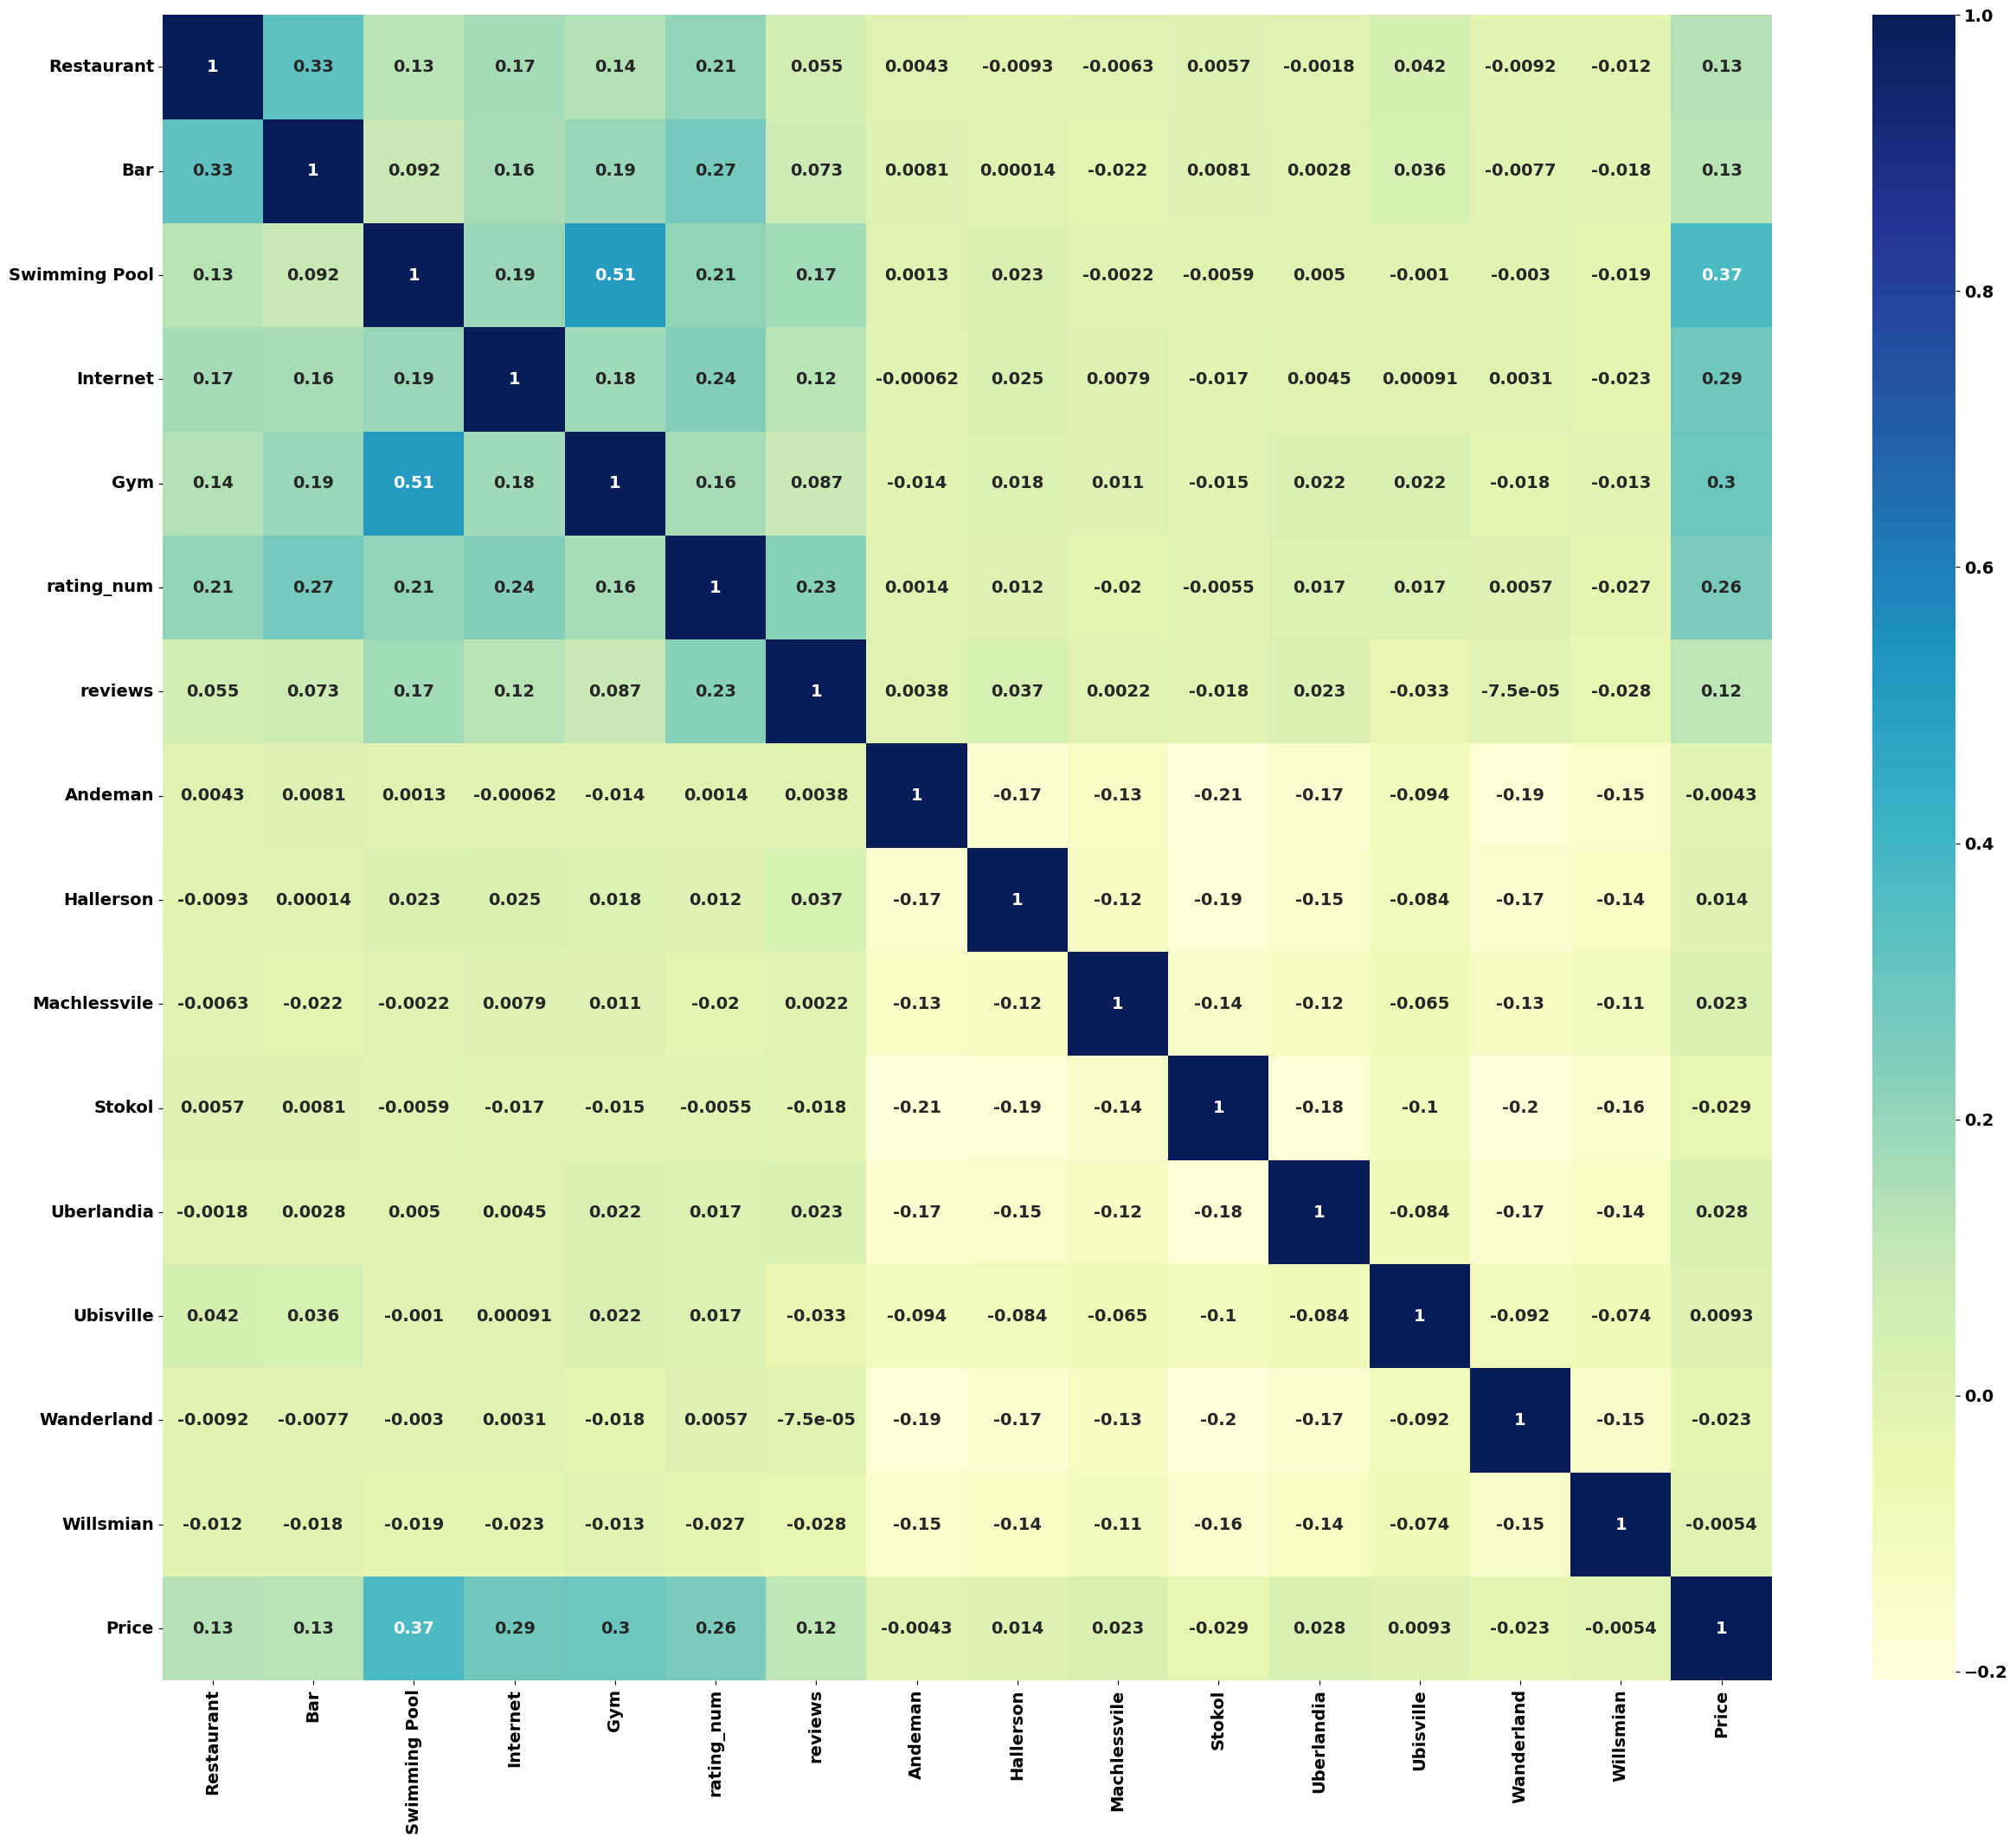

In [ ]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
dummy = pd.concat([combine[0], labels], axis=1)
sns.heatmap(dummy.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
lm = LinearRegression()
lm.fit(combine[0], labels)
combine[1] = sm.add_constant(combine[1])
combine[1]

,Restaurant,Bar,Swimming Pool,Internet,Gym,rating_num,reviews,Andeman,Hallerson,Machlessvile,Stokol,Uberlandia,Ubisville,Wanderland,Willsmian
0,1,1,1,1,1,0.80,0.000000,0,0,0,1,0,0,0,0
1,1,1,1,1,1,0.74,0.875000,0,1,0,0,0,0,0,0
2,0,1,1,1,1,0.00,0.125000,0,1,0,0,0,0,0,0
3,1,1,1,1,1,0.68,0.500000,1,0,0,0,0,0,0,0
4,1,1,1,1,1,0.00,0.333333,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1,1,1,0,1,0.81,0.333333,1,0,0,0,0,0,0,0
763,1,1,1,1,1,0.80,0.125000,0,0,0,0,0,0,1,0
764,1,1,1,1,1,0.74,0.750000,1,0,0,0,0,0,0,0
765,1,1,1,1,1,0.90,0.666667,0,1,0,0,0,0,0,0


In [ ]:
# Making predictions
y_pred = lm.predict(combine[1])
y_pred

array([[33024.],
       [35056.],
       [26848.],
       [33728.],
       [28464.],
       [28704.],
       [34240.],
       [31232.],
       [34576.],
       [34624.],
       [29056.],
       [31248.],
       [34320.],
       [33584.],
       [34624.],
       [34224.],
       [36160.],
       [32128.],
       [36048.],
       [28912.],
       [36992.],
       [31920.],
       [27424.],
       [28880.],
       [32304.],
       [29136.],
       [27952.],
       [27728.],
       [34912.],
       [36544.],
       [34464.],
       [27152.],
       [35280.],
       [32640.],
       [35088.],
       [31216.],
       [33568.],
       [33776.],
       [36256.],
       [27888.],
       [33680.],
       [34144.],
       [34512.],
       [33552.],
       [36304.],
       [34704.],
       [33376.],
       [34192.],
       [33872.],
       [33072.],
       [33632.],
       [32752.],
       [36688.],
       [34560.],
       [28160.],
       [27184.],
       [33072.],
       [34992.],
       [34144.

In [ ]:
submission = pd.DataFrame({
    "ID": id,
    "Price": y_pred[:,0].astype(int)
})

In [ ]:
submission.describe()

,ID,Price
count,767.000000,767.000000
mean,383.000000,32978.711864
std,221.558119,2851.273149
min,0.000000,21120.000000
25%,191.500000,31224.000000
50%,383.000000,33808.000000
75%,574.500000,34912.000000
max,766.000000,38448.000000


In [ ]:
submission.to_csv('InsigthInvestigator.csv', index=False)

In [ ]:
test.describe()

,Restaurant,Bar,Swimming Pool,Internet,Gym,rating_num,reviews
count,767.000000,767.000000,767.000000,767.000000,767.0,767.000000,767.000000
mean,0.959583,0.947849,0.989570,0.988266,1.0,0.579322,0.482019
std,0.197064,0.222477,0.101661,0.107757,0.0,0.322064,0.300961
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.0,0.505000,0.208333
50%,1.000000,1.000000,1.000000,1.000000,1.0,0.710000,0.458333
75%,1.000000,1.000000,1.000000,1.000000,1.0,0.800000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
